In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Create a dummy house price dataset

data = {
    'Size_sqft': [1000, 1500, 1800, 2400, 3000, 3500, 4000, 1200, 2000, 2800],
    'Bedrooms': [2, 3, 3, 4, 4, 5, 5, 2, 3, 4],
    'Bathrooms': [1, 2, 2, 3, 3, 4, 4, 1, 2, 3],
    'Age': [20, 15, 10, 5, 8, 2, 1, 25, 12, 6],
    'Location_Score': [5, 7, 8, 9, 6, 9, 10, 4, 7, 8],
    'Price': [150000, 200000, 250000, 320000, 360000, 450000, 500000, 140000, 270000, 390000]
}

df = pd.DataFrame(data)

df

,Size_sqft,Bedrooms,Bathrooms,Age,Location_Score,Price
0,1000,2,1,20,5,150000
1,1500,3,2,15,7,200000
2,1800,3,2,10,8,250000
3,2400,4,3,5,9,320000
4,3000,4,3,8,6,360000
5,3500,5,4,2,9,450000
6,4000,5,4,1,10,500000
7,1200,2,1,25,4,140000
8,2000,3,2,12,7,270000
9,2800,4,3,6,8,390000


In [3]:
# Check first few rows
df.head()

,Size_sqft,Bedrooms,Bathrooms,Age,Location_Score,Price
0,1000,2,1,20,5,150000
1,1500,3,2,15,7,200000
2,1800,3,2,10,8,250000
3,2400,4,3,5,9,320000
4,3000,4,3,8,6,360000


In [4]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Size_sqft       10 non-null     int64
 1   Bedrooms        10 non-null     int64
 2   Bathrooms       10 non-null     int64
 3   Age             10 non-null     int64
 4   Location_Score  10 non-null     int64
 5   Price           10 non-null     int64
dtypes: int64(6)
memory usage: 612.0 bytes


In [5]:
# Statistical summary
df.describe()

,Size_sqft,Bedrooms,Bathrooms,Age,Location_Score,Price
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2320.000000,3.500000,2.500000,10.400000,7.300000,303000.000000
std,997.552561,1.080123,1.080123,7.763161,1.888562,122931.778732
min,1000.000000,2.000000,1.000000,1.000000,4.000000,140000.000000
25%,1575.000000,3.000000,2.000000,5.250000,6.250000,212500.000000
50%,2200.000000,3.500000,2.500000,9.000000,7.500000,295000.000000
75%,2950.000000,4.000000,3.000000,14.250000,8.750000,382500.000000
max,4000.000000,5.000000,4.000000,25.000000,10.000000,500000.000000


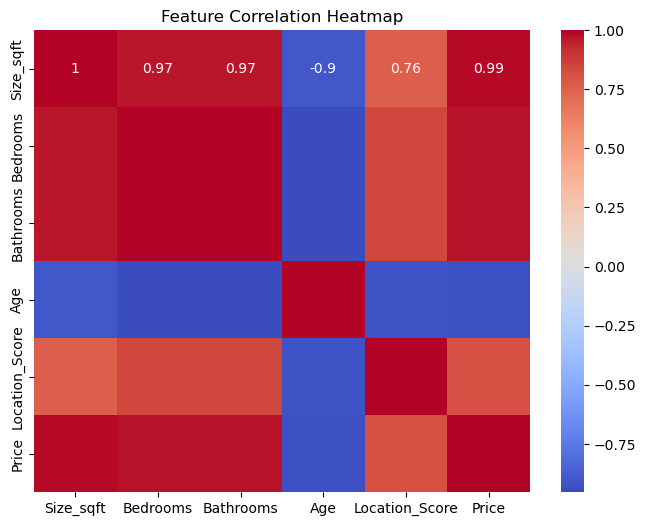

In [6]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [7]:
# Features (Independent variables)
X = df[['Size_sqft', 'Bedrooms', 'Bathrooms', 'Age', 'Location_Score']]

# Target (Dependent variable)
y = df['Price']

In [8]:
# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (8, 5)
Testing Data Shape: (2, 5)


In [9]:
# Create model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [10]:
# Display coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients

,Coefficient
Size_sqft,102.970829
Bedrooms,-3842.922436
Bathrooms,-3842.922436
Age,-2941.255545
Location_Score,4030.783707


In [11]:
# Intercept
print("Intercept:", model.intercept_)

Intercept: 89035.15257427024


In [12]:
# Predict on test data
y_pred = model.predict(X_test)

# Compare actual vs predicted
results = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred
})

results

,Actual Price,Predicted Price
8,270000,268682.618632
1,200000,208373.437290


In [13]:
# Calculate evaluation metrics

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics")
print("--------------------------")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)

Model Evaluation Metrics
--------------------------
Mean Absolute Error (MAE): 4845.409329210903
Mean Squared Error (MSE): 35924972.85941905
Root Mean Squared Error (RMSE): 5993.7444773212555
R2 Score: 0.9706734915433314


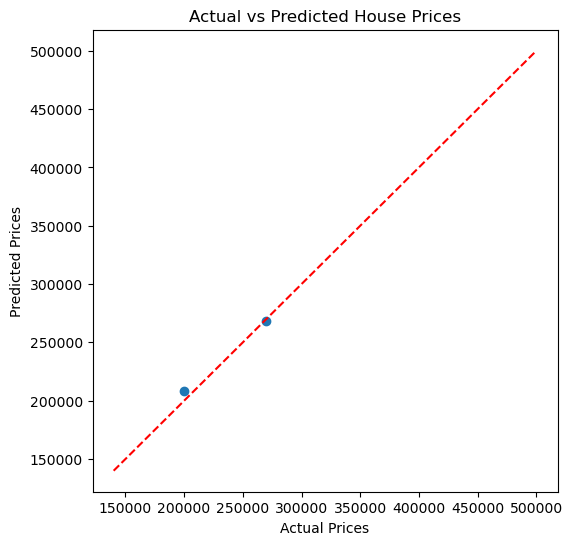

In [14]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

In [15]:
# Example new house
new_house = pd.DataFrame({
    'Size_sqft': [2200],
    'Bedrooms': [3],
    'Bathrooms': [2],
    'Age': [7],
    'Location_Score': [8]
})

predicted_price = model.predict(new_house)

print("Predicted Price of New House:", predicted_price[0])

Predicted Price of New House: 308013.8459470358


In [17]:
# Conclusion:

# In this project, we built a Linear Regression model to predict house prices 
# based on features such as size, number of bedrooms, bathrooms, age, and location score.

# The model was trained using Scikit-learn and evaluated using MAE, MSE, RMSE, and R² score.

# The results show that Linear Regression can effectively model the relationship 
# between house features and price.